In [1]:
from collections import defaultdict
import pandas as pd
import glob
import os

In [2]:
def load_data(path):
  articles_df = pd.DataFrame()

  topics = os.listdir(path) 
  for i in topics:
    # my_dir_path = f"{path}/{i}/"

    results = defaultdict(list)

    for file in glob.glob(f"{path}/{i}/*.txt"):
        with open(file, "r",encoding = "utf-8") as file_open:
            results["text"].append(file_open.read())
    df = pd.DataFrame(results)
    df["topic"]=i
    articles_df = pd.concat([articles_df,df])
  return articles_df

In [3]:
os.listdir("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\SANAD_SUBSET\\khaleej\\Test") 

['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']

In [4]:
os.listdir("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\SANAD_SUBSET\\khaleej\\Train") 

['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']

#### Read khaleej News

In [5]:
khaleej_test= load_data("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\SANAD_SUBSET\\khaleej\\Test")
khaleej_train= load_data("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\SANAD_SUBSET\\khaleej\\Train")

### Explore the dataset

In [6]:
khaleej_train

,text,topic
0,Body\nوصل المرشح الإماراتي لانتخابات رئاسة اله...,Culture
1,Body\nتقام اليوم الجولة النهائية لاختيار بطل أ...,Culture
2,Body\nأبوظبي:«الخليج» نظّمت جمعية الناشرين الإ...,Culture
3,"Body\nعمّان - ""الخليج"":وقعت رابطة الفنانين الت...",Culture
4,"Body\nالشارقة - ""الخليج"":شهد جناح الشارقة عاصم...",Culture
...,...,...
5845,Body\nأعلنت شركة أروبا نتوركس أمس، عن فوزها بع...,Tech
5846,Body\nتنظم أكاديمية اتصالات مؤتمر المستجدات ال...,Tech
5847,Body\nدبي:«الخليج» أعلنت ميرسر الشرق الأوسط، ش...,Tech
5848,Body\nأطلقت دائرة المالية المركزية بالشارقة، ع...,Tech


In [7]:
khaleej_test

,text,topic
0,Body\nالشارقة: «الخليج» أطلقت «هيئة الشارقة لل...,Culture
1,Body\nفي كل استعادة ذاتية وموضوعية للفنان ناجي...,Culture
2,Body\nالشارقة- محمد ولد محمد سالم: احتضن ملتقى...,Culture
3,Body\nدبي - غيث خوري: استضافت ندوة الثقافة وال...,Culture
4,Body\nيتلمس المتابع للحراك الثقافي في دولة الإ...,Culture
...,...,...
645,Body\nكشف بحث قامت به مؤسسة مورغان ستانلي مؤخر...,Tech
646,Body\nأعلنت سلطة مركز دبي المالي العالمي عن تع...,Tech
647,Body\nأعلنت دو عن مشاركتها في حملة مؤسسة الإما...,Tech
648,Body\nأعلنت سوني الخليج، الذراع الإقليمية لشرك...,Tech


In [8]:
khaleej_train["topic"].value_counts()

Culture     5850
Finance     5850
Medical     5850
Politics    5850
Religion    5850
Sports      5850
Tech        5850
Name: topic, dtype: int64

In [9]:
khaleej_test["topic"].value_counts()

Culture     650
Finance     650
Medical     650
Politics    650
Religion    650
Sports      650
Tech        650
Name: topic, dtype: int64

### Data Preprocessing

#### Loading used labiraries

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize 
arabic_stop_words=stopwords.words('arabic')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Normalizing and cleaning the text

In [12]:
import re
def normalize(data):
  sentences=""
  #for r in word_tokenize(data):
  text=data         #r['text']
  new_sent=re.sub(r'[^أ-ي _]', '', text)
  new_sent=re.sub(r'(.)\1+', r'\1', new_sent)
  new_sent=re.sub("[إأٱآا]", "ا", new_sent)
  new_sent=re.sub("_", " ", new_sent)
  new_sent = re.sub("ى", "ي", new_sent)
  new_sent = re.sub("ة", "ه", new_sent)
  new_sent = re.sub("ـ", "", new_sent)  
  
  sentences=new_sent

  return sentences

In [14]:
stop_words = stopwords.words('arabic')
khaleej_train['no_stopw']= khaleej_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [15]:
khaleej_train.head(2)

,text,topic,no_stopw
0,Body\nوصل المرشح الإماراتي لانتخابات رئاسة اله...,Culture,Body وصل المرشح الإماراتي لانتخابات رئاسة الهي...
1,Body\nتقام اليوم الجولة النهائية لاختيار بطل أ...,Culture,Body تقام اليوم الجولة النهائية لاختيار بطل أب...


In [17]:
khaleej_train['clean_text']= khaleej_train['no_stopw'].apply(normalize)

In [18]:
khaleej_train.to_csv("cleaned_articles_train.csv",encoding="utf-8-sig")

In [19]:

articles_df=pd.read_csv("cleaned_articles_train.csv")

In [20]:
articles_df.head(2)

,Unnamed: 0,text,topic,no_stopw,clean_text
0,0,Body\nوصل المرشح الإماراتي لانتخابات رئاسة اله...,Culture,Body وصل المرشح الإماراتي لانتخابات رئاسة الهي...,وصل المرشح الاماراتي لانتخابات رئاسه الهيئه ا...
1,1,Body\nتقام اليوم الجولة النهائية لاختيار بطل أ...,Culture,Body تقام اليوم الجولة النهائية لاختيار بطل أب...,تقام اليوم الجوله النهائيه لاختيار بطل ابوظبي...


In [23]:
articles_df.shape

(40950, 5)

In [ ]:
#!pip install ar_wordcloud

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [22]:
cv_k_means=Pipeline([
    ('cv',CountVectorizer()),
    ("k_means",KMeans(n_clusters=7, init='k-means++', max_iter=10000, n_init=1))
])

In [26]:
y_pred_cv_k_means=cv_k_means.fit_predict(articles_df["clean_text"])

In [27]:
len(y_pred_cv_k_means)

40950

In [28]:
cv_k_means["k_means"]

KMeans(max_iter=10000, n_clusters=7, n_init=1)

In [30]:
features=cv_k_means["cv"].fit_transform(articles_df["clean_text"])

In [31]:
features.shape

(40950, 416232)

In [32]:
from sklearn.metrics import  silhouette_score
silhouette_avg = silhouette_score(features , y_pred_cv_k_means)
print(silhouette_avg)

0.2227105645977876


     ------------------------------------ 282.6/282.6 kB 621.8 kB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\EMZ\anaconda3\lib\site-packages

C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\EMZ\anaconda3\lib\site-packages

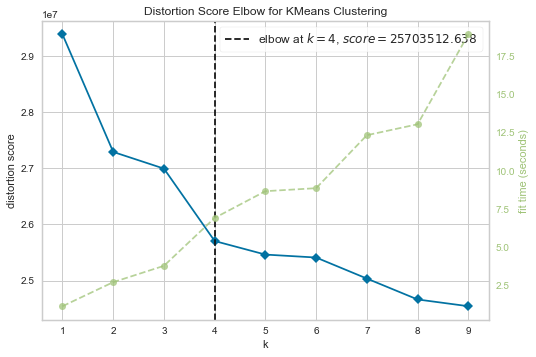

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(cv_k_means["k_means"], k=(1,10))

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show() 

In [35]:
features.shape

(40950, 416232)

In [36]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = TruncatedSVD(n_components=2)
pca.fit(features)
cv_PCA=pca.transform(features)

In [37]:
cv_PCA

array([[2.60836234, 2.68425277],
       [0.65781916, 1.46361406],
       [1.40492186, 1.84573068],
       ...,
       [0.28198884, 0.60852406],
       [3.46830163, 7.31096044],
       [0.48987615, 1.29185602]])

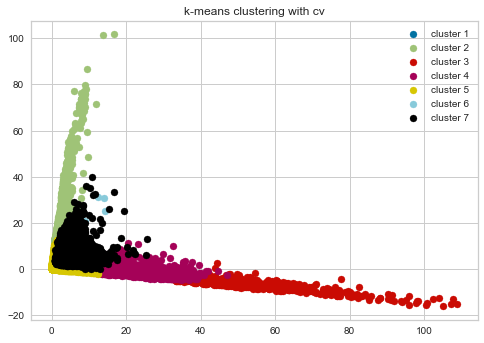

In [40]:
plt.scatter(cv_PCA[y_pred_cv_k_means ==0,0], cv_PCA[y_pred_cv_k_means == 0,1],label="cluster 1")
plt.scatter(cv_PCA[y_pred_cv_k_means ==1,0], cv_PCA[y_pred_cv_k_means == 1,1],label="cluster 2")
plt.scatter(cv_PCA[y_pred_cv_k_means ==2,0], cv_PCA[y_pred_cv_k_means == 2,1],label="cluster 3")
plt.scatter(cv_PCA[y_pred_cv_k_means ==3,0], cv_PCA[y_pred_cv_k_means == 3,1],label="cluster 4")
plt.scatter(cv_PCA[y_pred_cv_k_means ==4,0], cv_PCA[y_pred_cv_k_means == 4,1],label="cluster 5")
plt.scatter(cv_PCA[y_pred_cv_k_means ==5,0], cv_PCA[y_pred_cv_k_means == 5,1],label="cluster 6")
plt.scatter(cv_PCA[y_pred_cv_k_means ==6,0], cv_PCA[y_pred_cv_k_means == 6,1],color="black",label="cluster 7")
plt.title('k-means clustering with cv')  
plt.legend()
plt.show()

In [43]:
# five clusters
cv_5_means=Pipeline([
    ('cv',CountVectorizer()),
    ("k_means",KMeans(n_clusters=5, init='k-means++', max_iter=10000, n_init=1))
])
y_pred_cv_5_means=cv_5_means.fit_predict(articles_df["clean_text"])

In [45]:
features_5=cv_5_means["cv"].fit_transform(articles_df["clean_text"])
silhouette_avg = silhouette_score(features_5 , y_pred_cv_5_means)
print(silhouette_avg)

0.22274076653839822


In [46]:
pca = TruncatedSVD(n_components=2)
pca.fit(features)
cv_PCA_5=pca.transform(features)

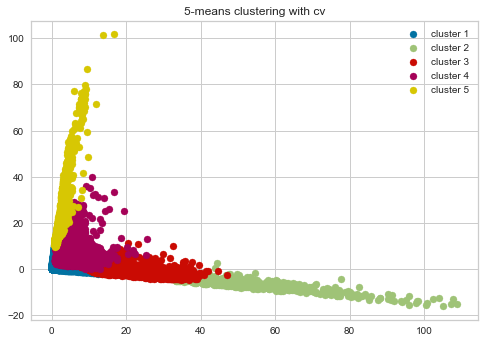

In [47]:
plt.scatter(cv_PCA_5[y_pred_tf_5_means ==0,0], cv_PCA_5[y_pred_tf_5_means == 0,1],label="cluster 1")
plt.scatter(cv_PCA_5[y_pred_tf_5_means ==1,0], cv_PCA_5[y_pred_tf_5_means == 1,1],label="cluster 2")
plt.scatter(cv_PCA_5[y_pred_tf_5_means ==2,0], cv_PCA_5[y_pred_tf_5_means == 2,1],label="cluster 3")
plt.scatter(cv_PCA_5[y_pred_tf_5_means ==3,0], cv_PCA_5[y_pred_tf_5_means == 3,1],label="cluster 4")
plt.scatter(cv_PCA_5[y_pred_tf_5_means ==4,0], cv_PCA_5[y_pred_tf_5_means == 4,1],label="cluster 5")
plt.title('5-means clustering with cv')  
plt.legend()
plt.show()

##### Agglomerative Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering
features_agg=CountVectorizer().fit_transform(articles_df["clean_text"])
cv_agg=AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [49]:
y_pred_agg=cv_agg.fit_predict(features_agg.todense())

MemoryError: Unable to allocate 127. GiB for an array with shape (40950, 416232) and data type int64

##### DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
features_db=CountVectorizer().fit_transform(articles_df["clean_text"])
cv_db=DBSCAN(min_samples=2)
y_pred_db = cv_db.fit_predict(features_db)

In [51]:
silhouette_avg = silhouette_score(features_db , y_pred_db)
print(silhouette_avg)

-0.35418742676581


In [52]:
svd = TruncatedSVD(n_components=2)
svd.fit(features_db)
cv_svd_db=svd.transform(features_db)

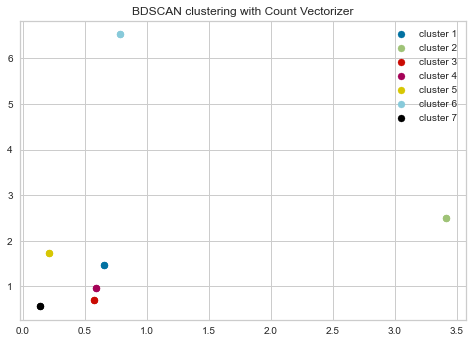

In [53]:
plt.scatter(cv_svd_db[y_pred_db ==0,0], cv_svd_db[y_pred_db == 0,1],label="cluster 1")
plt.scatter(cv_svd_db[y_pred_db ==1,0], cv_svd_db[y_pred_db == 1,1],label="cluster 2")
plt.scatter(cv_svd_db[y_pred_db ==2,0], cv_svd_db[y_pred_db == 2,1],label="cluster 3")
plt.scatter(cv_svd_db[y_pred_db ==3,0], cv_svd_db[y_pred_db == 3,1],label="cluster 4")
plt.scatter(cv_svd_db[y_pred_db ==4,0], cv_svd_db[y_pred_db == 4,1],label="cluster 5")
plt.scatter(cv_svd_db[y_pred_db ==5,0], cv_svd_db[y_pred_db == 5,1],label="cluster 6")
plt.scatter(cv_svd_db[y_pred_db ==6,0], cv_svd_db[y_pred_db == 6,1],color="black",label="cluster 7")
plt.title('BDSCAN clustering with Count Vectorizer')  
plt.legend()
plt.show()

#### Latent Dirichlet Allocation (LDA)

In [54]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(articles_df["clean_text"]))

In [55]:
data_words.shape

AttributeError: 'list' object has no attribute 'shape'

In [56]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 4), (15, 1), (16, 9), (17, 7), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


In [57]:
from pprint import pprint
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"اله" + 0.004*"بن" + 0.003*"خلال" + 0.003*"الامارات" + 0.002*"قال" + '
  '0.002*"دبي" + 0.002*"الدوله" + 0.002*"في" + 0.002*"وقال" + 0.002*"رييس"'),
 (1,
  '0.014*"مليون" + 0.005*"درهم" + 0.005*"سهم" + 0.005*"بنسبه" + 0.005*"ابوظبي" '
  '+ 0.004*"شركه" + 0.004*"دبي" + 0.004*"خلال" + 0.003*"الامارات" + '
  '0.003*"الاسهم"'),
 (2,
  '0.010*"مليون" + 0.010*"خلال" + 0.008*"سهم" + 0.007*"بنسبه" + 0.005*"بقيمه" '
  '+ 0.005*"اتصالات" + 0.005*"درهم" + 0.005*"شركه" + 0.005*"الشركات" + '
  '0.004*"تداول"'),
 (3,
  '0.005*"خلال" + 0.003*"العام" + 0.003*"الي" + 0.002*"نقطه" + 0.002*"دبي" + '
  '0.002*"العالم" + 0.002*"ان" + 0.002*"عبر" + 0.002*"اله" + 0.002*"الامارات"'),
 (4,
  '0.005*"خلال" + 0.005*"اله" + 0.003*"ان" + 0.003*"في" + 0.002*"وفي" + '
  '0.002*"وقال" + 0.002*"الامارات" + 0.002*"بن" + 0.002*"الثاني" + '
  '0.002*"الاسلام"'),
 (5,
  '0.019*"اله" + 0.005*"وسلم" + 0.005*"صلي" + 0.005*"قال" + 0.003*"الاسلام" + '
  '0.003*"تعالي" + 0.003*"انه" + 0.003*"الناس" + 0.003*"في" + 

In [58]:
!pip install pyLDAvis

     ---------------------------------------- 1.7/1.7 MB 751.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=06c65d9e92b7374587efca1c0e316c2faceac37d3ea0c496e954c69dd20ca5fd
  Stored in directory: c:\users\emz\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
Successfully built pyLDAvis

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pyLDAvis.gensim_models 
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared,'C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\EMZ\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.128057  0.019892       1        1  31.513351
0      0.039986 -0.018749       2        1  19.080305
6     -0.080144 -0.053509       3        1  16.216120
3      0.002685 -0.038306       4        1  13.064504
2     -0.076628  0.041163       5        1   8.658000
4      0.034402 -0.005255       6        1   7.280179
1     -0.048356  0.054764       7        1   4.187539, topic_info=          Term          Freq         Total Category  logprob  loglift
14550    مليون  27319.000000  27319.000000  Default  30.0000  30.0000
80         اله  90648.000000  90648.000000  Default  29.0000  29.0000
64539      سهم  15749.000000  15749.000000  Default  28.0000  28.0000
119       خلال  48784.000000  48784.000000  Default  27.0000  27.0000
1260       دبي  35804.000000  35804.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1048       وفي    962.966795  20705.927294   Topic7  -6.2111   0.1049
620    الشارقه    770.145468  10867.421835   Topic7  -6.4345   0.5261
1237       الي    812.276695  15884.749674   Topic7  -6.3813   0.1998
821     الخليج    724.657397   8596.692935   Topic7  -6.4954   0.6996
6399   اتصالات    727.774400  11849.791219   Topic7  -6.4911   0.3830

[664 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
235       1  0.130111  ابوظبي
235       2  0.124851  ابوظبي
235       3  0.274924  ابوظبي
235       4  0.054148  ابوظبي
235       5  0.220059  ابوظبي
...     ...       ...     ...
501       3  0.174503    يمكن
501       4  0.192898    يمكن
501       5  0.059608    يمكن
501       6  0.108562    يمكن
501       7  0.035182    يمكن

[2747 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 7, 4, 3, 5, 2])

#### NFM  

In [60]:
#!pip install --upgrade gensim

     -------------------------------------- 23.9/23.9 MB 578.4 kB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\EMZ\\anaconda3\\Lib\\site-packages\\~ensim\\corpora\\_mmreader.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [62]:
nmf = gensim.models.Nmf(corpus=corpus,id2word=id2word, num_topics=7)
pprint(nmf.print_topics())
doc_nfm = nmf[corpus]

[(0,
  '0.024*"مليون" + 0.020*"بنسبه" + 0.013*"نقطه" + 0.012*"سهم" + 0.012*"مليار" '
  '+ 0.011*"الاسهم" + 0.010*"العام" + 0.010*"سوق" + 0.010*"موشر" + '
  '0.009*"درهم"'),
 (1,
  '0.032*"اله" + 0.016*"دبي" + 0.011*"بن" + 0.011*"قال" + 0.010*"صلي" + '
  '0.010*"وسلم" + 0.006*"رسول" + 0.006*"رييس" + 0.006*"محمد" + 0.005*"الشاعر"'),
 (2,
  '0.028*"مليون" + 0.027*"دبي" + 0.027*"درهم" + 0.021*"سهم" + 0.015*"محصله" + '
  '0.014*"ابوظبي" + 0.012*"بقيمه" + 0.009*"شرا" + 0.009*"بنسبه" + 0.008*"بيع"'),
 (3,
  '0.022*"خلال" + 0.014*"الامارات" + 0.013*"سهم" + 0.011*"تداول" + '
  '0.011*"شركه" + 0.008*"الشارقه" + 0.008*"الشركات" + 0.008*"مستوي" + '
  '0.007*"تم" + 0.005*"بنسبه"'),
 (4,
  '0.004*"في" + 0.003*"خلال" + 0.003*"ان" + 0.002*"الاسلام" + 0.002*"انه" + '
  '0.002*"العالم" + 0.002*"عام" + 0.002*"وفي" + 0.002*"العام" + 0.002*"الي"'),
 (5,
  '0.040*"اله" + 0.012*"صلي" + 0.012*"وسلم" + 0.007*"قال" + 0.006*"تعالي" + '
  '0.006*"الاسلام" + 0.006*"رسول" + 0.005*"الناس" + 0.005*"في" + '
  '0.004*"

#### Stemming and remove stop words in one function

In [13]:
#!pip install farasapy
from farasa.stemmer import FarasaStemmer
stemmer = FarasaStemmer()

def remove_sw(text):
  text=stemmer.stem(text)
  filtered_sentence=""
  for w in word_tokenize(text):
    if w not in set(arabic_stop_words):
      filtered_sentence+=w+" "
  return filtered_sentence


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
### sample for training